In [60]:
#importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [61]:
# opening multiple netcdf files at once 
ds_Iraq=xr.open_dataset('Iraq_data.nc')
ds_Iraq=ds_Iraq.where(ds_Iraq !=-99)
ds_Iraq

<xarray.Dataset>
Dimensions:   (datetime: 3653, lat: 35, lon: 41)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon       (lon) float32 38.75 39.0 39.25 39.5 ... 48.0 48.25 48.5 48.75
  * lat       (lat) float32 37.75 37.5 37.25 37.0 ... 30.0 29.75 29.5 29.25
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Apr 29 21:23:23 2023: cdo mergetime PERSIANN_Iraq_2023-...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [62]:
#checking datasets properties 
type(ds_Iraq)

# checking the coordinates and dimensions 
ds_Iraq.coords

#checking the attributes
ds_Iraq.attrs

{'CDI': 'Climate Data Interface version 2.0.4 (https://mpimet.mpg.de/cdi)',
 'Conventions': 'CF-1.6',
 'history': 'Sat Apr 29 21:23:23 2023: cdo mergetime PERSIANN_Iraq_2023-04-29082830am_2011.nc PERSIANN_Iraq_2023-04-29082830am_2012.nc PERSIANN_Iraq_2023-04-29082830am_2013.nc PERSIANN_Iraq_2023-04-29082830am_2014.nc PERSIANN_Iraq_2023-04-29082830am_2015.nc PERSIANN_Iraq_2023-04-29082830am_2016.nc PERSIANN_Iraq_2023-04-29082830am_2017.nc PERSIANN_Iraq_2023-04-29082830am_2018.nc PERSIANN_Iraq_2023-04-29082830am_2019.nc PERSIANN_Iraq_2023-04-29082830am_2020.nc Iraq_data.nc',
 'CDO': 'Climate Data Operators version 2.0.4 (https://mpimet.mpg.de/cdo)'}

In [63]:
# checking variables available
ds_Iraq.data_vars

Data variables:
    crs      float64 1.0
    precip   (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [64]:
# assigning data's to variable precip
da_Iraq = ds_Iraq.precip

# removing all missing values
da_Iraq = da_Iraq.where(da_Iraq !=-99)

In [65]:
# checking datasets type
type(ds_Iraq)

xarray.core.dataset.Dataset

In [66]:
# checking data type
type(da_Iraq)

xarray.core.dataarray.DataArray

In [67]:
coords_Iraq=da_Iraq.sel(lon=44, lat=33, datetime=slice('2011','2020'))

# question 1


In [68]:
# MONTHLY RAINFALL TOTALS
Monthly_RR = coords_Iraq.groupby('datetime.month').sum('datetime')
Monthly_RR.to_series().reset_index()

,month,precip
0,1,152.979996
1,2,194.739990
2,3,195.589996
3,4,347.789978
4,5,185.429993
5,6,1.810000
6,7,0.000000
7,8,0.700000
8,9,0.000000
9,10,143.029999


In [69]:
#  LONG TERM CLIMATOLOGIES 
Longterm_Climatology_RR= coords_Iraq.groupby('datetime.month').mean('datetime')
Longterm_Climatology_RR.to_series().reset_index()

,month,precip
0,1,0.493484
1,2,0.688127
2,3,0.632977
3,4,1.159300
4,5,0.598161
5,6,0.006033
6,7,0.000000
7,8,0.002288
8,9,0.000000
9,10,0.464383


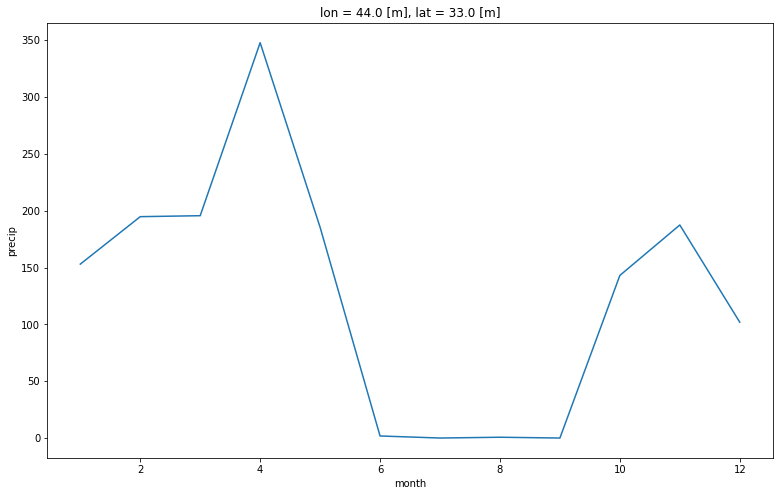

In [70]:
Monthly_RR.plot()

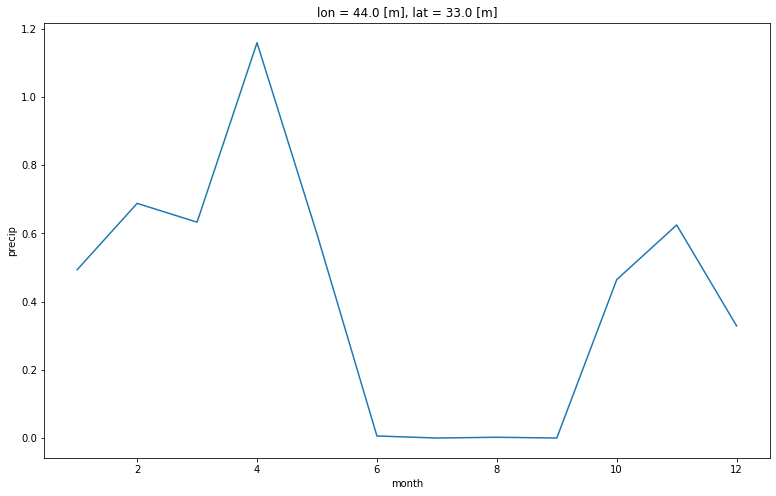

In [71]:
Longterm_Climatology_RR.plot()

# QUESTION 2

In [72]:
# computing Annual Totals
Annual_Totals_RR = coords_Iraq.resample(datetime='Y').sum('datetime')
Annual_Totals_RR.to_series().reset_index()

,datetime,precip
0,2011-12-31,98.910004
1,2012-12-31,66.570000
2,2013-12-31,133.220001
3,2014-12-31,129.190002
4,2015-12-31,94.679993
5,2016-12-31,119.300003
6,2017-12-31,135.880005
7,2018-12-31,407.010010
8,2019-12-31,180.559998
9,2020-12-31,146.070007


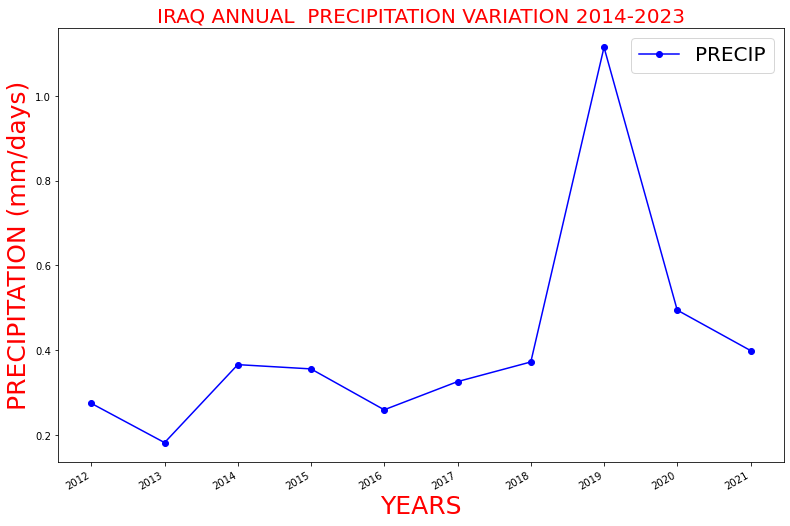

In [73]:
# Annual Average
Annual_Totals_RR= coords_Iraq.resample(datetime='1Y').mean('datetime')
Annual_Totals_RR.plot(color = 'b',marker='o', label='PRECIP')

barwidth = 0.3
plt.rcParams['figure.figsize']=[20,8]

# locating the legend
plt.legend(loc='upper right', fontsize=20)

# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=25, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')

plt.title('IRAQ ANNUAL  PRECIPITATION VARIATION 2014-2023', fontsize=20, color='r')
    
#plt.savefig('Annual_average_timeseries.png')
plt.show()

In [74]:

Annual_Average_RR= coords_Iraq.groupby('datetime.year').sum('datetime')
Annual_Average_RR.to_series().reset_index()

,year,precip
0,2011,98.910004
1,2012,66.570000
2,2013,133.220001
3,2014,129.190002
4,2015,94.679993
5,2016,119.300003
6,2017,135.880005
7,2018,407.010010
8,2019,180.559998
9,2020,146.070007


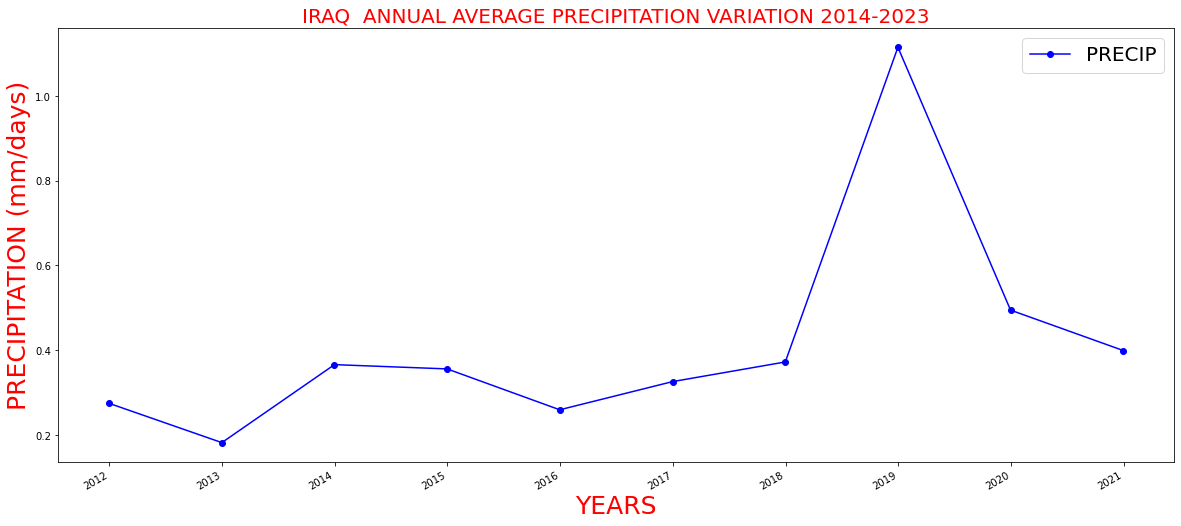

In [75]:
# Annual Average
Annual_Average_RR= coords_Iraq.resample(datetime='1Y').mean('datetime')
Annual_Average_RR.plot(color = 'b',marker='o', label='PRECIP')

barwidth = 0.3
plt.rcParams['figure.figsize']=[13,8]

# locating the legend
plt.legend(loc='upper right', fontsize=20)

# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=25, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')

plt.title('IRAQ  ANNUAL AVERAGE PRECIPITATION VARIATION 2014-2023', fontsize=20, color='r')
    
#plt.savefig('Annual_average_timeseries.png')
plt.show()

# QUESTION 3

In [90]:
Monthly_RR2 = coords_Iraq.groupby('datetime.month').sum()
Monthly_RR2

<xarray.DataArray 'precip' (month: 12)>
array([152.98     , 194.73999  , 195.59     , 347.78998  , 185.43     ,
         1.8100001,   0.       ,   0.7      ,   0.       , 143.03     ,
       187.42     , 101.899994 ], dtype=float32)
Coordinates:
    lon      float32 44.0
    lat      float32 33.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [91]:
#computing the number of dry PER MONTH
#selecting precipitation <1mm
dry_CRR= da_Iraq.where(da_Iraq<1).sel(lon=44, lat=33, datetime=slice('2011','2020'))
dry_CRR=dry_CRR.where(dry_CRR !=-99)

dry_cmon=dry_CRR.groupby('datetime.month').mean('datetime')
dry_cmon.to_series().reset_index()

,month,precip
0,1,0.050804
1,2,0.048353
2,3,0.059407
3,4,0.067967
4,5,0.056942
5,6,0.002341
6,7,0.000000
7,8,0.002288
8,9,0.000000
9,10,0.023614


In [92]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------MONTHLY--------
#computing the number of dry PER MONTH
#selecting precipitation <1mm
dry_RR= da_Iraq.where(da_Iraq <1)
dry_RR=dry_RR.where(dry_RR !=-99)

dry_mon=dry_RR.groupby('datetime.month').mean('datetime')
dry_mon.to_series().reset_index()

# cartopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy import feature as cf

In [93]:
# COMPUTING THE NUMBER FOR WET (RR>1mm) PER MONTH----------------MONTHLY----------
#selecting precipitation >1mm
wet_CRR= da_Iraq.where(da_Iraq >=1).sel(lon=44, lat=33, datetime=slice('2011','2020'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').mean('datetime')
wet_cmon.to_series().reset_index()

,month,precip
0,1,5.768750
1,2,6.514643
2,3,4.603846
3,4,6.130926
4,5,5.300000
5,6,1.110000
6,7,NaN
7,8,NaN
8,9,NaN
9,10,5.926086


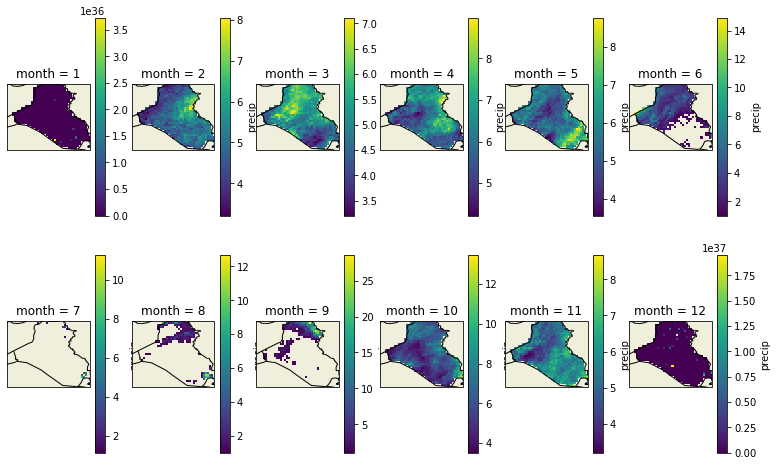

In [94]:
# SPATIAL PLOTS FOR THE NUMBER OF WET (RR>=1mm)----------------MONTHLY--------

#selecting precipitation >1mm
wet_RR= da_Iraq.where(da_Iraq >=1)
wet_RR=wet_RR.where(wet_RR !=-99)
wet_RR
wet_mon=wet_RR.groupby('datetime.month').mean('datetime')
wet_mon.to_series().reset_index()
fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#wet_mon.plot.contourf(x='lon',y='lat', col='month',col_wrap=6);
count=0
for Months in wet_mon.month:
    count+=1
    ax=fig.add_subplot(2,6,count,projection=ccrs.PlateCarree())
    wet_mon[wet_mon.month==Months].plot()
    
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([38, 48, 29, 37])

In [95]:
#-----------COMPUTING THE NUMBER OF DRY (RR<1mm) PER ANNUAL-------------ANNUAL--------
#selecting precipitation <1mm
Annual_dry_RR= da_Iraq.where(da_Iraq <1).sel(lon=44, lat=33, datetime=slice('2011','2020'))
Annual_dry_RR
Annual_cdry=Annual_dry_RR.groupby('datetime.year').mean('datetime')
Annual_cdry.to_series().reset_index()

,year,precip
0,2011,0.018140
1,2012,0.024310
2,2013,0.031671
3,2014,0.042597
4,2015,0.034855
5,2016,0.017901
6,2017,0.024985
7,2018,0.047571
8,2019,0.034354
9,2020,0.032267


In [96]:
# COMPUTING THE NUMBER OF WET (RR>=1mm)------ANNUAL
#selecting precipitation >1mm
Annual_wet_RR= da_Iraq.where(da_Iraq >=1).sel(lon=44, lat=33, datetime=slice('2011','2020'))
Annual_wet_RR
# GROUPING data in years
Annual_cwet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_cwet.to_series().reset_index()

,year,precip
0,2011,5.791875
1,2012,3.228333
2,2013,7.190000
3,2014,4.104286
4,2015,3.937619
5,2016,4.920000
6,2017,5.306667
7,2018,8.165208
8,2019,5.285000
9,2020,6.135000


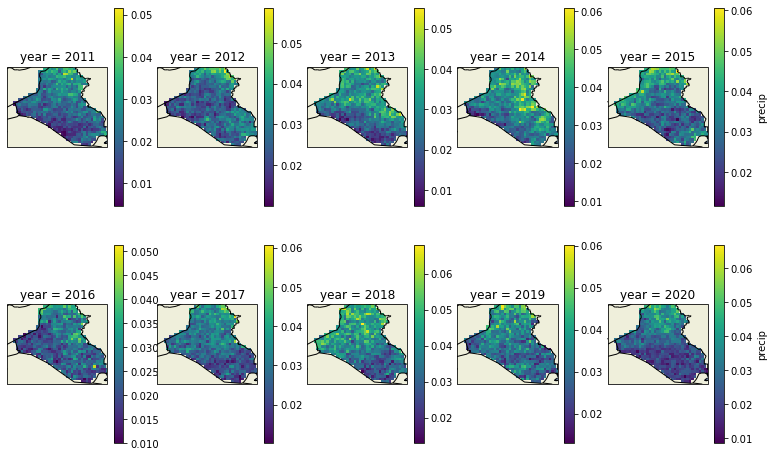

In [97]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------ANNUAL--------
#selecting precipitation <1mm
Annual_dry_RR= da_Iraq.where(da_Iraq <1)
Annual_dry_RR
Annual_dry=Annual_dry_RR.groupby('datetime.year').mean('datetime')
Annual_dry

fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#Annual_wet.plot.contourf(x='lon',y='lat', col='month',col_wrap=6);
count=0
for Years in Annual_dry.year:
    count+=1
    ax=fig.add_subplot(2,5,count,projection=ccrs.PlateCarree())
    Annual_dry[Annual_dry.year==Years].plot()
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([38, 48, 29, 37])
    #grid=ax.gridlines()
    #grid.xlabels_bottom=True; grid.ylabel_left=True
    #grid.xformatter=LONGITUDE_FORMATTER
    #grid.yformatter=LONGITUDE_FORMATTER

#plt.savefig('(DRY)ANNUAL.png')
plt.show()

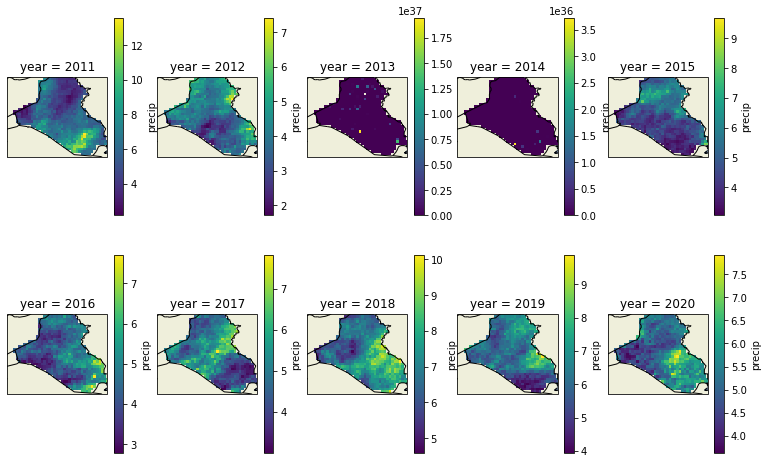

In [98]:
# SPATIAL PLOTS FOR THE NUMBER OF WET (RR>=1mm)----------------ANNUAL--------
#selecting precipitation >1mm
Annual_wet_RR= da_Iraq.where(da_Iraq>=1)
Annual_wet_RR
# GROUPING data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_wet

fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#Annual_dry.plot.contourf(x='lon',y='lat', col='month',col_wrap=6);
count=0
for Years in Annual_wet.year:
    count+=1
    ax=fig.add_subplot(2,5,count,projection=ccrs.PlateCarree())
    Annual_wet[Annual_wet.year==Years].plot()
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([38, 48, 29, 37])
    #grid=ax.gridlines()
    #grid.xlabels_bottom=True; grid.ylabel_left=True
    #grid.xformatter=LONGITUDE_FORMATTER
    #grid.yformatter=LONGITUDE_FORMATTER

#plt.savefig('(WET)ANNUAL.png')
plt.show()

In [99]:
# selecting coordintes
coordinates_Iraq=ds_Iraq.sel(lon=44, lat=33, datetime=slice('2011','2020'))

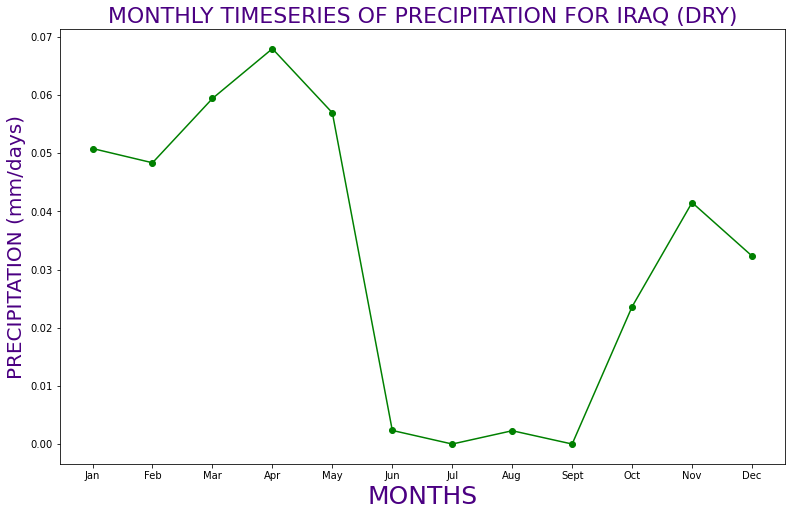

In [100]:
#computing the number of dry PER MONTH TIMESERIES
#selecting precipitation <1mm
dry_RR= dry_cmon.where(dry_cmon <1)
dry_RR=dry_RR.where(dry_RR !=-99)
Months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

plt.plot(Months,dry_RR,color = 'g',marker='o', label='PRECIP')
plt.title('MONTHLY TIMESERIES OF PRECIPITATION FOR IRAQ (DRY)', fontsize='22', color='indigo')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='indigo')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=25, color='indigo')
plt.savefig('MONTHLY (TIMESERIES(DRY MONTH).png')
plt.show()

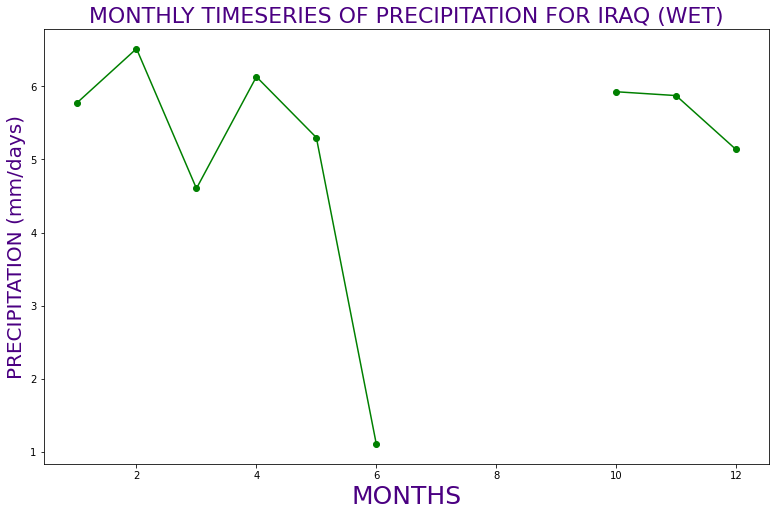

In [101]:
# TIMESERIES PLOT FOR WET (RR>1mm) PER MONTH----------------MONTHLY----------
#selecting precipitation >1mm
wet_CRR= da_Iraq.where(da_Iraq >=1).sel(lon=44, lat=33, datetime=slice('2011','2020'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').mean('datetime')
wet_cmon.plot(color = 'g',marker='o', label='PRECIP')

plt.title('MONTHLY TIMESERIES OF PRECIPITATION FOR IRAQ (WET)', fontsize='22', color='indigo')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='indigo')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=25, color='indigo')

plt.show()

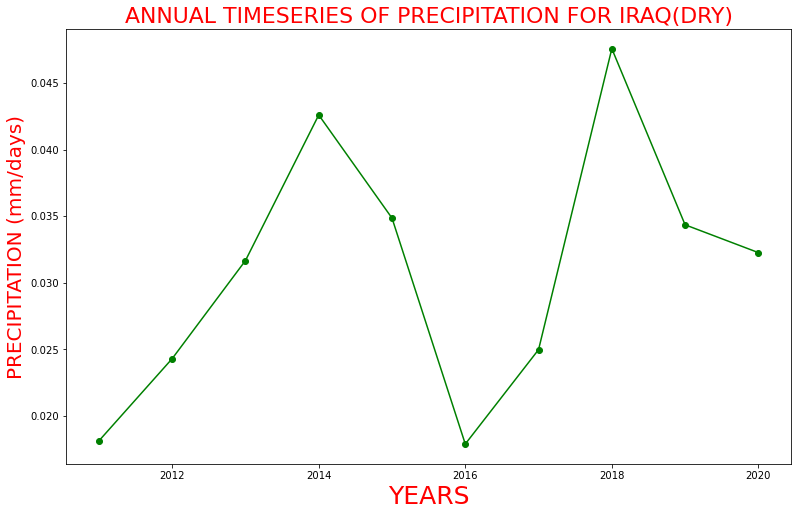

In [102]:
# COMPUTING THE NUMBER OF DRY (RR<1mm)-----MONTHLY TIMESERIES----
#selecting precipitation <1mm
Annual_cdry.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL TIMESERIES OF PRECIPITATION FOR IRAQ(DRY)', fontsize='22', color='r')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')
plt.savefig('ANNUAL (TIMESERIES(DRY).png')
plt.show()

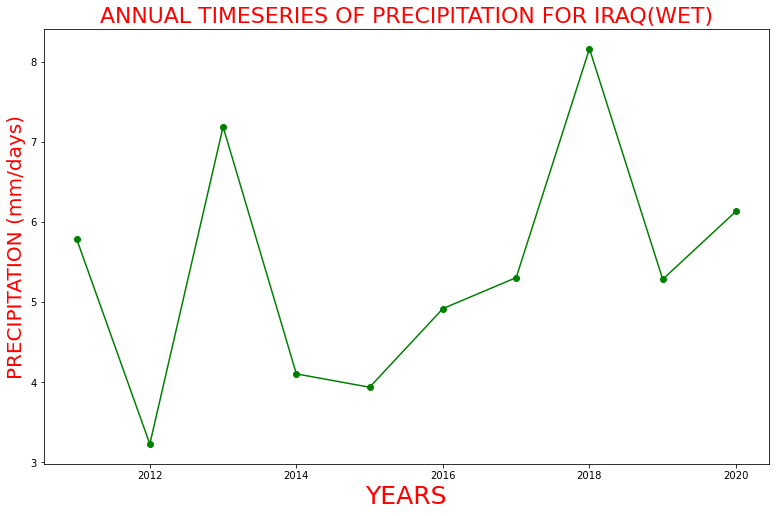

In [103]:
# COMPUTING THE NUMBER OF DRY (RR>=1mm) MONTHLY
#selecting precipitation >1mm

Annual_cwet.plot(color = 'g',marker='o', label='PRECIP')
plt.title('ANNUAL TIMESERIES OF PRECIPITATION FOR IRAQ(WET)', fontsize='22', color='r')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')
#plt.savefig('ANNUAL (TIMESERIES(WET).png')
plt.show()

# QUESTION 4

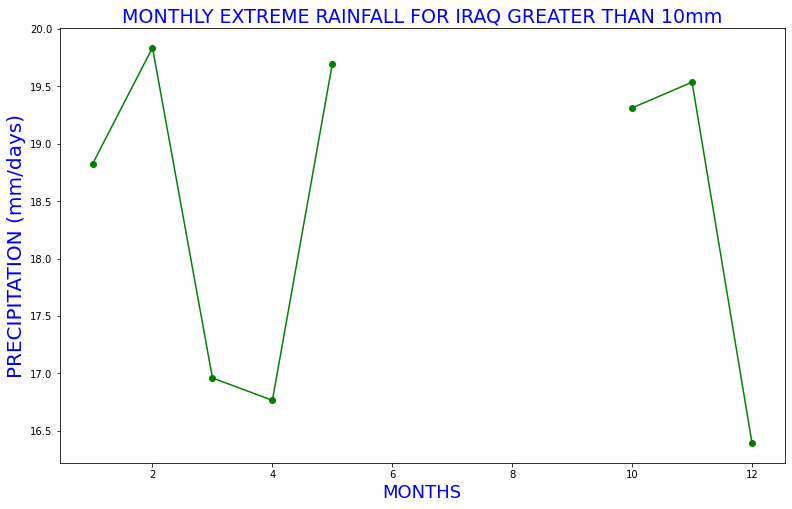

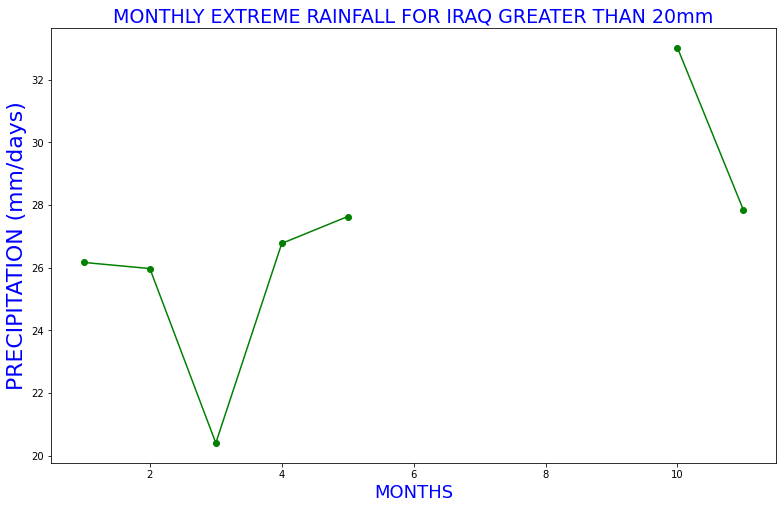

In [104]:
# COMPUTING THE NUMBER OF DRY (RR>10mm)-----MONTHLY TIMESERIES----
#selecting precipitation >10mm
dry_RR= coordinates_Iraq.where(coordinates_Iraq['precip'] >10).precip
dry_RR
dry_RR.sel()
dry1=dry_RR.groupby('datetime.month').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
dry1
plt.title('MONTHLY EXTREME RAINFALL FOR IRAQ GREATER THAN 10mm', fontsize='19', color='b')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='b')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=18, color='b')

plt.show()

#selecting precipitation >20mm
dry_RR= coordinates_Iraq.where(coordinates_Iraq['precip'] >20).precip
dry_RR
dry_RR.sel()
dry2=dry_RR.groupby('datetime.month').mean('datetime')
dry2
dry2.plot(color = 'g',marker='o', label='PRECIP');
plt.title('MONTHLY EXTREME RAINFALL FOR IRAQ GREATER THAN 20mm', fontsize='19', color='b')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=22, color='b')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=18, color='b')
plt.savefig('MONTHLY EXTREME RR(20).png')
plt.show()

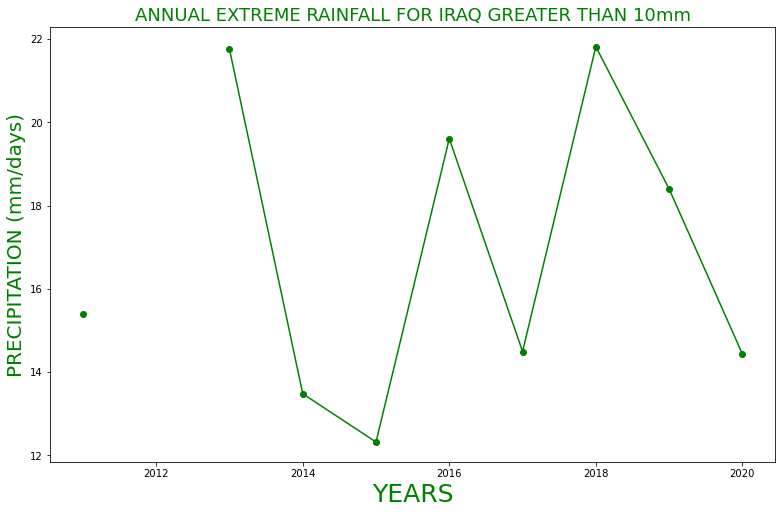

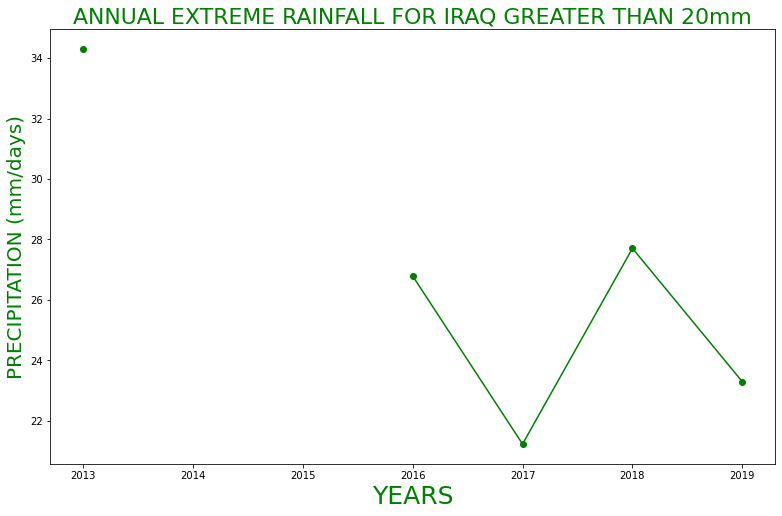

In [105]:
# COMPUTING THE NUMBER OF DRY (RR>10mm)-----ANNUAL TIMESERIES----
#selecting precipitation >10mm
dry_RR= coordinates_Iraq.where(coordinates_Iraq['precip'] >10).precip
dry_RR
dry_RR.sel()
dry1=dry_RR.groupby('datetime.year').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL EXTREME RAINFALL FOR IRAQ GREATER THAN 10mm', fontsize='18', color='g')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='g')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='g')
plt.savefig('ANNUAL (TIMESERIES(DRY).png')
plt.show()

#selecting precipitation >20mm
dry_RR= coordinates_Iraq.where(coordinates_Iraq['precip'] >20).precip
dry_RR
dry1=dry_RR.groupby('datetime.year').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL EXTREME RAINFALL FOR IRAQ GREATER THAN 20mm', fontsize='22', color='g')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='g')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='g')
#plt.savefig('ANNUAL (TIMESERIES(WET).png')
plt.show()

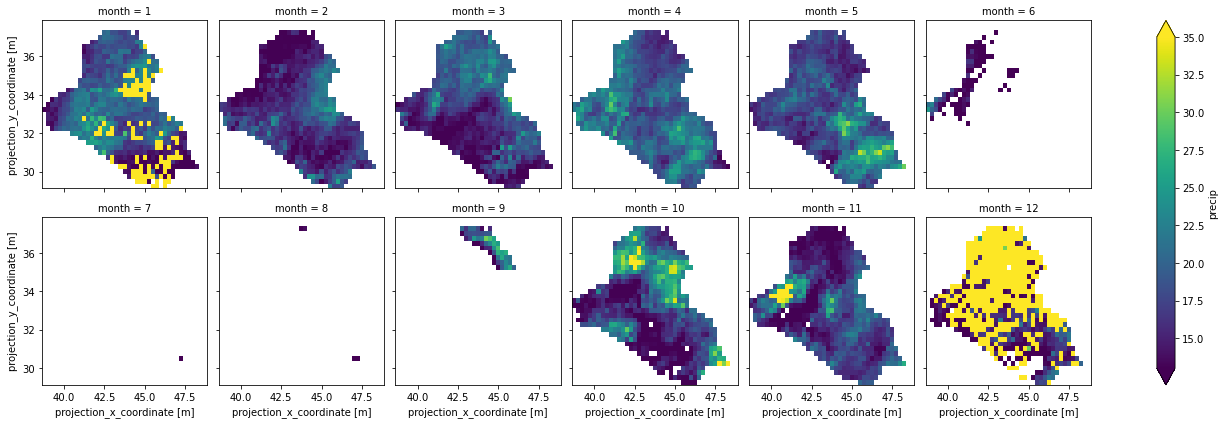

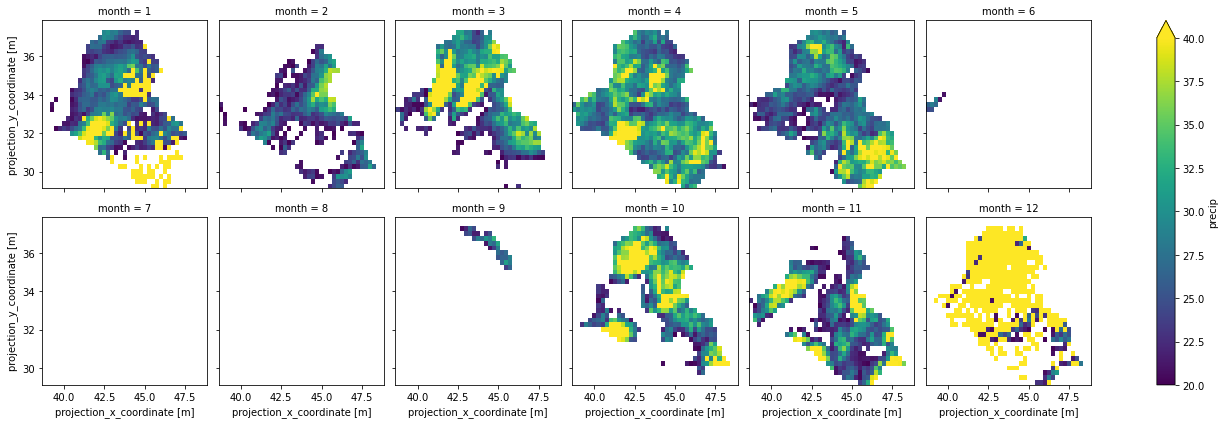

In [106]:
#selecting precipitation >10mm
dry_RR= ds_Iraq.where(ds_Iraq['precip'] >10).precip
dry_RR

dry1=dry_RR.groupby('datetime.month').mean('datetime')[:,:,:]
dry1.plot(vmax=35, vmin=13, col_wrap=6, col='month');

plt.show()

#selecting precipitation >10mm
dry_RR= ds_Iraq.where(ds_Iraq['precip'] >20).precip
dry_RR

dry1=dry_RR.groupby('datetime.month').mean('datetime')[:,:,:]
dry1.plot(vmax=40, vmin=20, col_wrap=6, col='month');

plt.show()

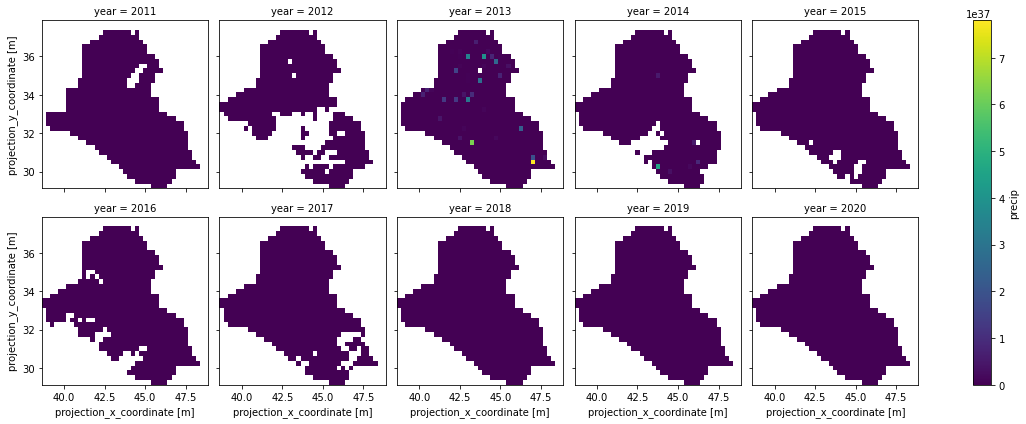

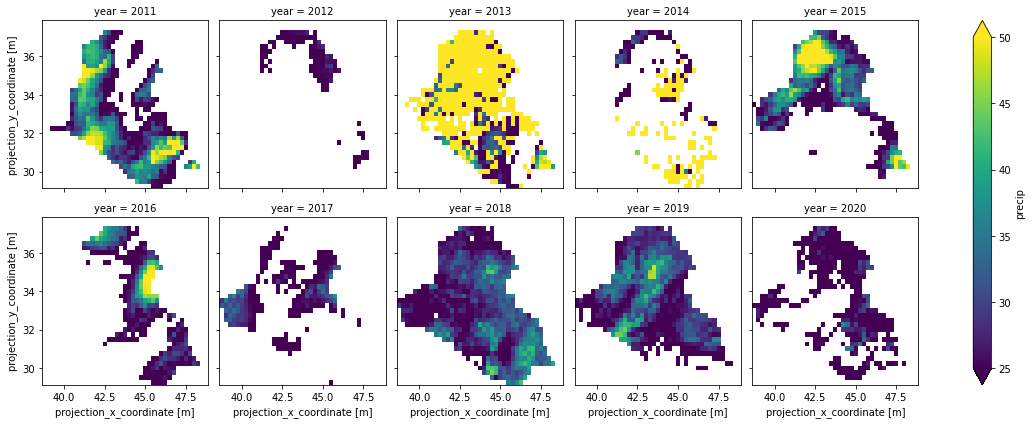

In [107]:
#selecting precipitation >10mm
Annual_dry_RR= ds_Iraq.where(ds_Iraq['precip'] >10).precip
Annual_dry_RR
Annual_dry=Annual_dry_RR.groupby('datetime.year').mean('datetime')[:,:,:]
Annual_dry.plot(col_wrap=5, col='year')
#plt.savefig('R>10 Spatial ANNUAL.png')
plt.show()

#selecting precipitation >20mm
Annual_wet_RR= da_Iraq.where(da_Iraq >=20)
Annual_wet_RR
# GROUPING data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')[:,:,:]
Annual_wet.plot(vmax=50, vmin=25, col_wrap=5, col='year')
#plt.savefig('R>20 Spatial ANNUAL.png')
plt.show()